<h1>Test Uniform, Default and Xavier Uniform Initialization on MNIST dataset with tanh activation</h1>


In [4]:
import torch 
from torch import nn, optim
from torchvision import transforms, datasets
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)
%matplotlib inline

In [48]:
class Net(nn.Module):
    def __init__(self, layers, weight_init = None, act_func = torch.tanh):
        super(Net, self).__init__()
        self.act_func = act_func
        self.layers = nn.ModuleList()
        for i, input_size in enumerate(layers[:-1]):
            output_size = layers[i + 1]
            linear = nn.Linear(input_size, output_size)
            if weight_init == 'Xavier':
                torch.nn.init.xavier_uniform_(linear.weight)
            elif weight_init == 'Uniform':
                torch.nn.init.uniform_(linear.weight)
            self.layers.append(linear)
            
    def forward(self, x):
        for i, layer in enumerate(self.layers):
            if i < len(self.layers) - 1:
                x = self.act_func(layer(x))
            else:
                x = layer(x)
        return x

In [62]:
def train_model(model, criterion, train_loader, val_loader, optimizer, epochs):
    results_dict = {'training loss':[], 'validation accuracy':[]}  
    for epoch in range(epochs):
        epoch_cost = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            epoch_cost += loss.item()
        results_dict['training loss'].append(epoch_cost)
            
        correct = 0
        for x, y in val_loader:
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label==y).sum().item()
        accuracy = 100 * (correct / len(val_loader.dataset))
        results_dict['validation accuracy'].append(accuracy)
        
        print(epoch, end=' ')
    return results_dict

In [58]:
train_data = datasets.MNIST(root='../data', train=True, download=True, transform=transforms.ToTensor())

In [59]:
val_data = datasets.MNIST(root='../data', train=False, download=True, transform=transforms.ToTensor())

In [60]:
from torch.utils.data import DataLoader
trainloader = DataLoader(dataset=train_data, batch_size=30, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=5000, shuffle=False)

criterion = nn.CrossEntropyLoss()

layers = [28 * 28, 100, 10, 100, 10, 100, 10]

In [63]:
model = Net(layers)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
training_results = train_model(model, criterion, trainloader, val_loader, optimizer, epochs=30)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

In [67]:
model_Xavier = Net(layers, weight_init='Xavier')
optimizer = torch.optim.SGD(model_Xavier.parameters(), lr=0.01)
training_results_Xavier = train_model(model_Xavier, criterion, trainloader, val_loader, optimizer, epochs=30)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

In [69]:
model_Uniform = Net(layers, weight_init='Uniform')
optimizer = torch.optim.SGD(model_Uniform.parameters(), lr=0.01)
training_results_Uniform = train_model(model_Uniform, criterion, trainloader, val_loader, optimizer, epochs=30)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

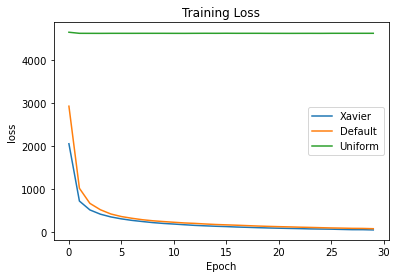

In [73]:
plt.plot(training_results_Xavier['training loss'], label='Xavier')
plt.plot(training_results['training loss'], label='Default')
plt.plot(training_results_Uniform['training loss'], label='Uniform')
plt.ylabel('loss')
plt.xlabel('Epoch')  
plt.title('Training Loss')
plt.legend()
plt.show()

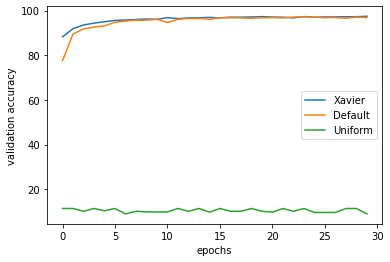

In [71]:
plt.plot(training_results_Xavier['validation accuracy'], label='Xavier')
plt.plot(training_results['validation accuracy'], label='Default')
plt.plot(training_results_Uniform['validation accuracy'], label='Uniform') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs')   
plt.legend()
plt.show()